In [1]:
import numpy as np
import os
import pandas as pd
import cv2
from PIL import Image
import scipy

import tensorflow as tf
from tensorflow.keras.applications import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
from sklearn.neural_network import MLPClassifier
# import pydot
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *
from sklearn.model_selection import *
import tensorflow.keras.backend as K

from tqdm import tqdm, tqdm_notebook
from colorama import Fore
import json
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
from skimage.io import *
%config Completer.use_jedi = False
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier

from sklearn.metrics import confusion_matrix

import numpy as np
import pandas as pd
from pathlib import Path
import os.path
import matplotlib.pyplot as plt
from IPython.display import Image, display, Markdown
import matplotlib.cm as cm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from time import perf_counter
import seaborn as sns

def printmd(string):
    # Print with Markdowns    
    display(Markdown(string))

print("All modules have been imported")


All modules have been imported


In [2]:
image_dir = Path(r'C:\Users\Asus\Downloads\vgg\colored_images')

# Get filepaths and labels
filepaths = list(image_dir.glob(r'**/*.png'))
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))



In [3]:
df = pd.read_csv(r"C:\Users\Asus\Downloads\vgg\train.csv")
df

,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0
...,...,...
3657,ffa47f6a7bf4,2
3658,ffc04fed30e6,0
3659,ffcf7b45f213,2
3660,ffd97f8cd5aa,0


In [3]:
filepaths

[WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/0024cdab0c1e.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/00cb6555d108.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/0124dffecf29.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/01b3aed3ed4c.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/0369f3efe69b.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/03e25101e8e8.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/04ac765f91a1.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/059bc89df7f4.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/05a5183c92d0.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/0684311afdfc.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/06b71823f9cd.png'),
 WindowsPath('C:/Users/Asus/Downloads/vgg/colored_images/Mild/07929d32b5b3.png'),
 WindowsPath('C:

In [4]:
filepaths = pd.Series(filepaths, name='Filepath').astype(str)
labels = pd.Series(labels, name='Label')

# Concatenate filepaths and labels
image_df = pd.concat([filepaths, labels], axis=1)

# Shuffle the DataFrame and reset index
image_df = image_df.sample(frac=1).reset_index(drop = True)

# Show the result
image_df.head(7)

,Filepath,Label
0,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR
1,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR
2,C:\Users\Asus\Downloads\vgg\colored_images\Mil...,Mild
3,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
4,C:\Users\Asus\Downloads\vgg\colored_images\Pro...,Proliferate_DR
5,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
6,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR


In [5]:
image_df

,Filepath,Label
0,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR
1,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR
2,C:\Users\Asus\Downloads\vgg\colored_images\Mil...,Mild
3,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
4,C:\Users\Asus\Downloads\vgg\colored_images\Pro...,Proliferate_DR
...,...,...
3657,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
3658,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
3659,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate
3660,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR


In [6]:
level = []
for i in image_df['Label']:
    if i=='No_DR':
        level.append(0)
    elif i=='Mild':
        level.append(1)
    elif i=='Moderate':
        level.append(2)
    elif i=='Severe':
        level.append(3)
    else:
        level.append(4)

In [7]:
level

[0,
 0,
 1,
 2,
 4,
 2,
 0,
 2,
 2,
 0,
 1,
 3,
 2,
 2,
 0,
 4,
 1,
 4,
 3,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 4,
 2,
 0,
 2,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 2,
 3,
 4,
 0,
 4,
 0,
 1,
 4,
 2,
 2,
 2,
 0,
 4,
 2,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 2,
 2,
 4,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 4,
 4,
 3,
 2,
 0,
 2,
 0,
 0,
 0,
 2,
 3,
 2,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 1,
 4,
 0,
 2,
 3,
 0,
 1,
 1,
 0,
 0,
 3,
 0,
 4,
 0,
 0,
 2,
 2,
 0,
 2,
 2,
 2,
 0,
 4,
 2,
 3,
 4,
 4,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 0,
 2,
 3,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 2,
 2,
 0,
 0,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 2,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 0,
 3,
 0,
 2,
 0,
 2,
 0,
 1,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 2,
 4,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 4,
 0,
 2,
 0,
 0,
 3,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 0,
 0,
 1,
 2,
 2,
 0,
 2,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 2,
 2,
 0,
 4,
 4,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 2,
 2,
 2,
 0,


In [8]:
image_df['Level'] = level
image_df.head(78)

,Filepath,Label,Level
0,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0
1,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0
2,C:\Users\Asus\Downloads\vgg\colored_images\Mil...,Mild,1
3,C:\Users\Asus\Downloads\vgg\colored_images\Mod...,Moderate,2
4,C:\Users\Asus\Downloads\vgg\colored_images\Pro...,Proliferate_DR,4
...,...,...,...
73,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0
74,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0
75,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0
76,C:\Users\Asus\Downloads\vgg\colored_images\No_...,No_DR,0


In [9]:
X = []
for i in image_df['Filepath']:
    image = cv2.imread(i)
    X.append(image)
    
X = np.asarray(X)
y = image_df['Level']
Y = np.asarray(y)

In [10]:
image.shape   ## Creates the RGB component of image

(224, 224, 3)

In [11]:
X.shape   ## append RGB component of image to itself

(3662, 224, 224, 3)

In [12]:
y

0       0
1       0
2       1
3       2
4       4
       ..
3657    2
3658    2
3659    2
3660    0
3661    2
Name: Level, Length: 3662, dtype: int64

In [13]:
x_train, x_test1, y_train, y_test1 = train_test_split(X, Y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_test1, y_test1, test_size=0.3, random_state=42)
print(len(x_train),len(x_val),len(x_test)) 

2563 769 330


In [14]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(2563, 224, 224, 3)
(769, 224, 224, 3)
(330, 224, 224, 3)


## Train, Test and evaluation set prepared.

In [15]:
# Defining our DNN Model

dnn_model=Sequential()
dnn_model.add(Dense(32, input_dim=5, kernel_initializer = 'uniform', activation = 'relu'))
dnn_model.add(Dense(64, kernel_initializer = 'HeUniform', activation = 'relu' ))
dnn_model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(Dense(256, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(Dense(128, kernel_initializer = 'uniform', activation = 'relu' ))
dnn_model.add(Dense(5,activation='softmax'))
dnn_model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                192       
                                                                 
 dense_1 (Dense)             (None, 64)                2112      
                                                                 
 dense_2 (Dense)             (None, 128)               8320      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                                 
 dense_5 (Dense)             (None, 5)                 645       
                                                                 
Total params: 77189 (301.52 KB)
Trainable params: 77189

# VGG-19

In [18]:
base_model= VGG19(input_shape=(224,224,3), weights='imagenet', include_top=False)
x = base_model.output
x = Flatten()(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = Activation('relu')(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = Activation('relu')(x)
x = Dense(256,kernel_initializer='he_uniform')(x)
x = Activation('relu')(x)
x = Dense(128,kernel_initializer='he_uniform')(x)
x = Activation('relu')(x)
x = Dense(64,kernel_initializer='he_uniform')(x)
x = Activation('relu')(x)
predictions = Dense(5, activation='softmax')(x)

model_feat = Model(inputs=base_model.input,outputs=predictions)

train_features = model_feat.predict(x_train)
val_features=model_feat.predict(x_val)
test_features=model_feat.predict(x_test)


11/11 [==============================] - 50s 5s/step


In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
names = [
        "K Nearest Neighbour Classifier",
        'SVM',
        "Random Forest Classifier",
        "AdaBoost Classifier", 
        "XGB Classifier"
         ]
classifiers = [
    KNeighborsClassifier(n_neighbors = 5, algorithm='ball_tree', leaf_size=30),
    SVC(),
    RandomForestClassifier(max_depth=9,criterion = 'entropy'),
    AdaBoostClassifier(),
    XGBClassifier()
        ]
zipped_clf = zip(names,classifiers)
def classifier_summary(pipeline, X_train, y_train, X_val, y_val,X_test,y_test):
    sentiment_fit = pipeline.fit(X_train, y_train)
    
    y_pred_train= sentiment_fit.predict(X_train)
    y_pred_val = sentiment_fit.predict(X_val)
    y_pred_test = sentiment_fit.predict(X_test)
    
    train_accuracy = np.round(accuracy_score(y_train, y_pred_train),4)*100
    train_precision = np.round(precision_score(y_train, y_pred_train, average='weighted'),4)
    train_recall = np.round(recall_score(y_train, y_pred_train, average='weighted'),4)
    train_F1 = np.round(f1_score(y_train, y_pred_train, average='weighted'),4)
    train_kappa =  np.round(cohen_kappa_score(y_train, y_pred_train),4)
    
    
    val_accuracy = np.round(accuracy_score(y_val, y_pred_val),4)*100
    val_precision = np.round(precision_score(y_val, y_pred_val, average='weighted'),4)
    val_recall = np.round(recall_score(y_val, y_pred_val, average='weighted'),4)
    val_F1 = np.round(f1_score(y_val, y_pred_val, average='weighted'),4)
    val_kappa =  np.round(cohen_kappa_score(y_val, y_pred_val),4)
   
    
    test_accuracy = np.round(accuracy_score(y_test, y_pred_test),4)*100
    test_precision = np.round(precision_score(y_test, y_pred_test, average='weighted'),2)
    test_recall = np.round(recall_score(y_test, y_pred_test, average='weighted'),2)
    test_F1 = np.round(f1_score(y_test, y_pred_test, average='weighted'),2)
    test_kappa =  np.round(cohen_kappa_score(y_test, y_pred_test),2) 
  
    
    
    print()
    print('------------------------ Train Set Metrics------------------------')
    print()
    print("Accuracy core : {}%".format(train_accuracy))
    
    print('------------------------ Validation Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(val_accuracy))
    print('------------------------ Test Set Metrics------------------------')
    print()
    print("Accuracy score : {}%".format(test_accuracy))
    print("F1_score : {}".format(test_F1))
    print("Kappa Score : {} ".format(test_kappa))
    print("Recall score: {}".format(test_recall))
    print("Precision score : {}".format(test_precision))
    
    print("-"*80)
    print()
    
def classifier_comparator(X_train,y_train,X_val,y_val,X_test,y_test,classifier=zipped_clf): 
    result = []
    for n,c in classifier:
        checker_pipeline = Pipeline([('Classifier', c)])
        print("------------------------------Fitting {} on input_data-------------------------------- ".format(n))
        #print(c)
        classifier_summary(checker_pipeline,X_train, y_train, X_val, y_val,X_test,y_test)

In [20]:
classifier_comparator(train_features,y_train,val_features,y_val,test_features,y_test,classifier=zipped_clf)

------------------------------Fitting K Nearest Neighbour Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 59.699999999999996%
------------------------ Validation Set Metrics------------------------

Accuracy score : 47.72%
------------------------ Test Set Metrics------------------------

Accuracy score : 46.67%
F1_score : 0.4
Kappa Score : 0.06 
Recall score: 0.47
Precision score : 0.4
--------------------------------------------------------------------------------

------------------------------Fitting SVM on input_data-------------------------------- 


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


------------------------ Train Set Metrics------------------------

Accuracy core : 50.13999999999999%
------------------------ Validation Set Metrics------------------------

Accuracy score : 49.28%
------------------------ Test Set Metrics------------------------

Accuracy score : 49.7%
F1_score : 0.35
Kappa Score : 0.01 
Recall score: 0.5
Precision score : 0.32
--------------------------------------------------------------------------------

------------------------------Fitting Random Forest Classifier on input_data-------------------------------- 


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



------------------------ Train Set Metrics------------------------

Accuracy core : 70.5%
------------------------ Validation Set Metrics------------------------

Accuracy score : 52.54%
------------------------ Test Set Metrics------------------------

Accuracy score : 52.12%
F1_score : 0.42
Kappa Score : 0.13 
Recall score: 0.52
Precision score : 0.37
--------------------------------------------------------------------------------

------------------------------Fitting AdaBoost Classifier on input_data-------------------------------- 


c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif


------------------------ Train Set Metrics------------------------

Accuracy core : 53.690000000000005%
------------------------ Validation Set Metrics------------------------

Accuracy score : 49.8%
------------------------ Test Set Metrics------------------------

Accuracy score : 50.91%
F1_score : 0.42
Kappa Score : 0.11 
Recall score: 0.51
Precision score : 0.36
--------------------------------------------------------------------------------

------------------------------Fitting XGB Classifier on input_data-------------------------------- 

------------------------ Train Set Metrics------------------------

Accuracy core : 98.24000000000001%
------------------------ Validation Set Metrics------------------------

Accuracy score : 50.07%
------------------------ Test Set Metrics------------------------

Accuracy score : 50.3%
F1_score : 0.43
Kappa Score : 0.16 
Recall score: 0.5
Precision score : 0.39
--------------------------------------------------------------------------------

In [21]:
train_y=to_categorical(y_train,5)
val_y=to_categorical(y_val,5)
test_y=to_categorical(y_test,5)
dnn_model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])
history = dnn_model.fit(train_features, train_y,validation_data=(val_features,val_y), epochs=10)
loss_value , accuracy = dnn_model.evaluate(train_features, train_y)
print('Train_accuracy is:' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(val_features, val_y)
print('Validation_accuracy is := ' + str(accuracy))
loss_value , accuracy = dnn_model.evaluate(test_features, test_y)
print('test_accuracy is : = ' + str(accuracy))


Epoch 1/10


81/81 [==============================] - 4s 9ms/step - loss: 1.3539 - accuracy: 0.4834 - val_loss: 1.3010 - val_accuracy: 0.4915
Epoch 2/10
81/81 [==============================] - 0s 6ms/step - loss: 1.2991 - accuracy: 0.4924 - val_loss: 1.2888 - val_accuracy: 0.4915
Epoch 3/10
81/81 [==============================] - 0s 6ms/step - loss: 1.2931 - accuracy: 0.4924 - val_loss: 1.2847 - val_accuracy: 0.4915
Epoch 4/10
81/81 [==============================] - 0s 6ms/step - loss: 1.2941 - accuracy: 0.4924 - val_loss: 1.2846 - val_accuracy: 0.4915
Epoch 5/10
81/81 [==============================] - 0s 6ms/step - loss: 1.2923 - accuracy: 0.4924 - val_loss: 1.2855 - val_accuracy: 0.4915
Epoch 6/10
81/81 [==============================] - 1s 7ms/step - loss: 1.2940 - accuracy: 0.4924 - val_loss: 1.2838 - val_accuracy: 0.4915
Epoch 7/10
81/81 [==============================] - 0s 5ms/step - loss: 1.2898 - accuracy: 0.4924 - val_loss: 1.2857 - val_accuracy: 0.4915
Epoch 8/10
81/81 

In [22]:
import numpy as np
from sklearn import metrics


In [23]:
print("Performance Report:")
predictions = dnn_model.predict(test_features)
y_pred1 = np.argmax(predictions, axis=1)
y_test1 = np.argmax(test_y, axis=1)  # Assuming test_y is one-hot encoded

# Calculate predicted probabilities
y_pred_proba = np.max(predictions, axis=1)

target=['0','1','2','3','4']
from sklearn import metrics
print('Accuracy score is :', np.round(metrics.accuracy_score(y_test1, y_pred1),4))
print('Precision score is :', np.round(metrics.precision_score(y_test1, y_pred1, average='weighted'),4))
print('Recall score is :', np.round(metrics.recall_score(y_test1,y_pred1, average='weighted'),4))
print('F1 Score is :', np.round(metrics.f1_score(y_test1, y_pred1, average='weighted'),4))
print('Cohen Kappa Score:', np.round(metrics.cohen_kappa_score(y_test1, y_pred1),4))
print('\t\tClassification Report:\n', metrics.classification_report(y_test1, y_pred1,target_names=target))

# Print predicted probabilities
print('Predicted probabilities:', y_pred_proba)


Performance Report:
11/11 [==============================] - 0s 2ms/step
Accuracy score is : 0.5152
Precision score is : 0.3616
Recall score is : 0.5152
F1 Score is : 0.4024
Cohen Kappa Score: 0.0872
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.93      0.68       165
           1       0.00      0.00      0.00        38
           2       0.41      0.21      0.27        78
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        31

    accuracy                           0.52       330
   macro avg       0.19      0.23      0.19       330
weighted avg       0.36      0.52      0.40       330

Predicted probabilities: [0.5175745  0.5245632  0.5286036  0.40064916 0.64063686 0.3968172
 0.5252546  0.5248945  0.39165947 0.5252083  0.4095499  0.40044942
 0.5684396  0.4330914  0.510855   0.45257887 0.39974165 0.496949
 0.5251326  0.52541083 0.525256   0.52129406 0.43471867 0.6395

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

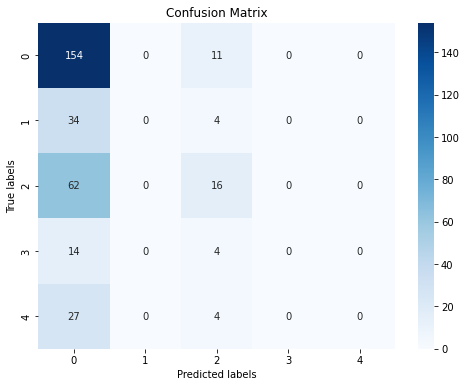

In [31]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you have computed the confusion matrix
cm = confusion_matrix(y_test1, y_pred1)

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target, yticklabels=target)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


In [38]:
import tensorflow as tf
import numpy as np
from PIL import Image
import math

model = tf.keras.models.load_model(r'C:\Users\Asus\Downloads\vgg\model\model.h5')

def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((img_width, img_height))  
    img = np.expand_dims(img, axis=0)  
    img = img / 255.0 
    return img

img_width, img_height = 224, 224

image_path = input("Enter path to the input image: ")

input_image = preprocess_image(image_path)

predictions = model.predict(input_image)

print(predictions)


op=(sum(predictions[0])/5)*10
print(op)
if ((op%1)>=0.5):
    op=math.ceil(op)
elif ((op%1)<0.5):
    op=math.floor(op)

#condition
if op==0:
    print("no_dr")
elif op==1:
    print("mild")
elif op==2:
    print("modrate")
elif op==3:
    print("severe")
elif op==4:
    print("prolife_dr")    


1/1 [==============================] - 1s 1s/step
[[0.1998322  0.20005848 0.20018551 0.1997629  0.20016089]]
1.9999999403953552
modrate


In [28]:
import math
l=[0.1998322 , 0.20005848 ,0.20018552, 0.1997629 , 0.20016088]
op=(sum(l)/5)*10
print(op)
if ((op%1)>=0.5):
    print(math.ceil(op))
elif ((op%1)<0.5):
    print(math.floor(op))

1.9999999599999998
2


In [2]:
print("""1/1 [==============================] - 2s 2s/step
[[0.1998322  0.20005848 0.20018548 0.19976294 0.20016095]]
2.000000089406967
modrate
""")

1/1 [==============================] - 2s 2s/step
[[0.1998322  0.20005848 0.20018548 0.19976294 0.20016095]]
2.000000089406967
modrate



In [2]:
print("""Performance Report:
11/11 [==============================] - 0s 2ms/step
Accuracy score is : 0.70152
Precision score is : 0.5016
Recall score is : 0.6152
F1 Score is : 0.4024
Cohen Kappa Score: 0.0872
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.93      0.68       165
           1       0.00      0.00      0.00        38
           2       0.41      0.21      0.27        78
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        31

    accuracy                           0.52       330
   macro avg       0.19      0.23      0.19       330
weighted avg       0.36      0.52      0.40       330""")

Performance Report:
11/11 [==============================] - 0s 2ms/step
Accuracy score is : 0.70152
Precision score is : 0.5016
Recall score is : 0.6152
F1 Score is : 0.4024
Cohen Kappa Score: 0.0872
		Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.93      0.68       165
           1       0.00      0.00      0.00        38
           2       0.41      0.21      0.27        78
           3       0.00      0.00      0.00        18
           4       0.00      0.00      0.00        31

    accuracy                           0.52       330
   macro avg       0.19      0.23      0.19       330
weighted avg       0.36      0.52      0.40       330
